In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adamax, Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Thyroid_Diff.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [6]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [7]:
categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
                       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
                       'T', 'N', 'M', 'Stage', 'Response','Recurred']
df = pd.get_dummies(df, columns = categorical_columns, drop_first=True)

In [8]:
age_column = df['Age'].values.reshape(-1, 1)

scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(age_column)

df['Age'] = age_scaled

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               383 non-null    float64
 1   Gender_M                                          383 non-null    bool   
 2   Smoking_Yes                                       383 non-null    bool   
 3   Hx Smoking_Yes                                    383 non-null    bool   
 4   Hx Radiothreapy_Yes                               383 non-null    bool   
 5   Thyroid Function_Clinical Hypothyroidism          383 non-null    bool   
 6   Thyroid Function_Euthyroid                        383 non-null    bool   
 7   Thyroid Function_Subclinical Hyperthyroidism      383 non-null    bool   
 8   Thyroid Function_Subclinical Hypothyroidism       383 non-null    bool   
 9   Physical Examination_

In [10]:
df.head()

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,0.179104,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.283582,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0.223881,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.701493,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0.701493,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [11]:
X = df.drop(columns= ['Recurred_Yes'])
Y = df['Recurred_Yes']

In [12]:
X

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.179104,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.283582,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.223881,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.701493,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.701493,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.850746,True,True,True,True,False,True,False,False,False,...,False,True,True,False,False,False,True,False,False,False
379,0.985075,True,True,False,True,False,True,False,False,True,...,False,True,True,False,False,False,True,False,False,True
380,0.850746,True,True,True,False,False,True,False,False,True,...,False,True,True,False,False,False,True,False,False,True
381,0.686567,True,True,True,True,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [13]:
Y

0      False
1      False
2      False
3      False
4      False
       ...  
378     True
379     True
380     True
381     True
382     True
Name: Recurred_Yes, Length: 383, dtype: bool

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, shuffle=True, random_state=42)

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_dim=40),
    Dropout(0.2),
    Dense(20, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer= Adamax(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,243 (8.76 KB)

 Trainable params: 2,243 (8.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=32, epochs= 30,validation_split=0.1
                   , callbacks=[early_stopping])

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5264 - loss: 0.7004 - val_accuracy: 0.6571 - val_loss: 0.6735
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7290 - loss: 0.6549 - val_accuracy: 0.6571 - val_loss: 0.6381
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7116 - loss: 0.6167 - val_accuracy: 0.6571 - val_loss: 0.5556
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6886 - loss: 0.5439 - val_accuracy: 0.6571 - val_loss: 0.4363
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7721 - loss: 0.4347 - val_accuracy: 0.9143 - val_loss: 0.3552
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8678 - loss: 0.3557 - val_accuracy: 0.9429 - val_loss: 0.3155
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9119 - loss: 0.2753 - val_accuracy: 0.9429 - val_loss: 0.2565
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8814 - loss: 0.3576 - val_accuracy: 0.9429 - val_loss

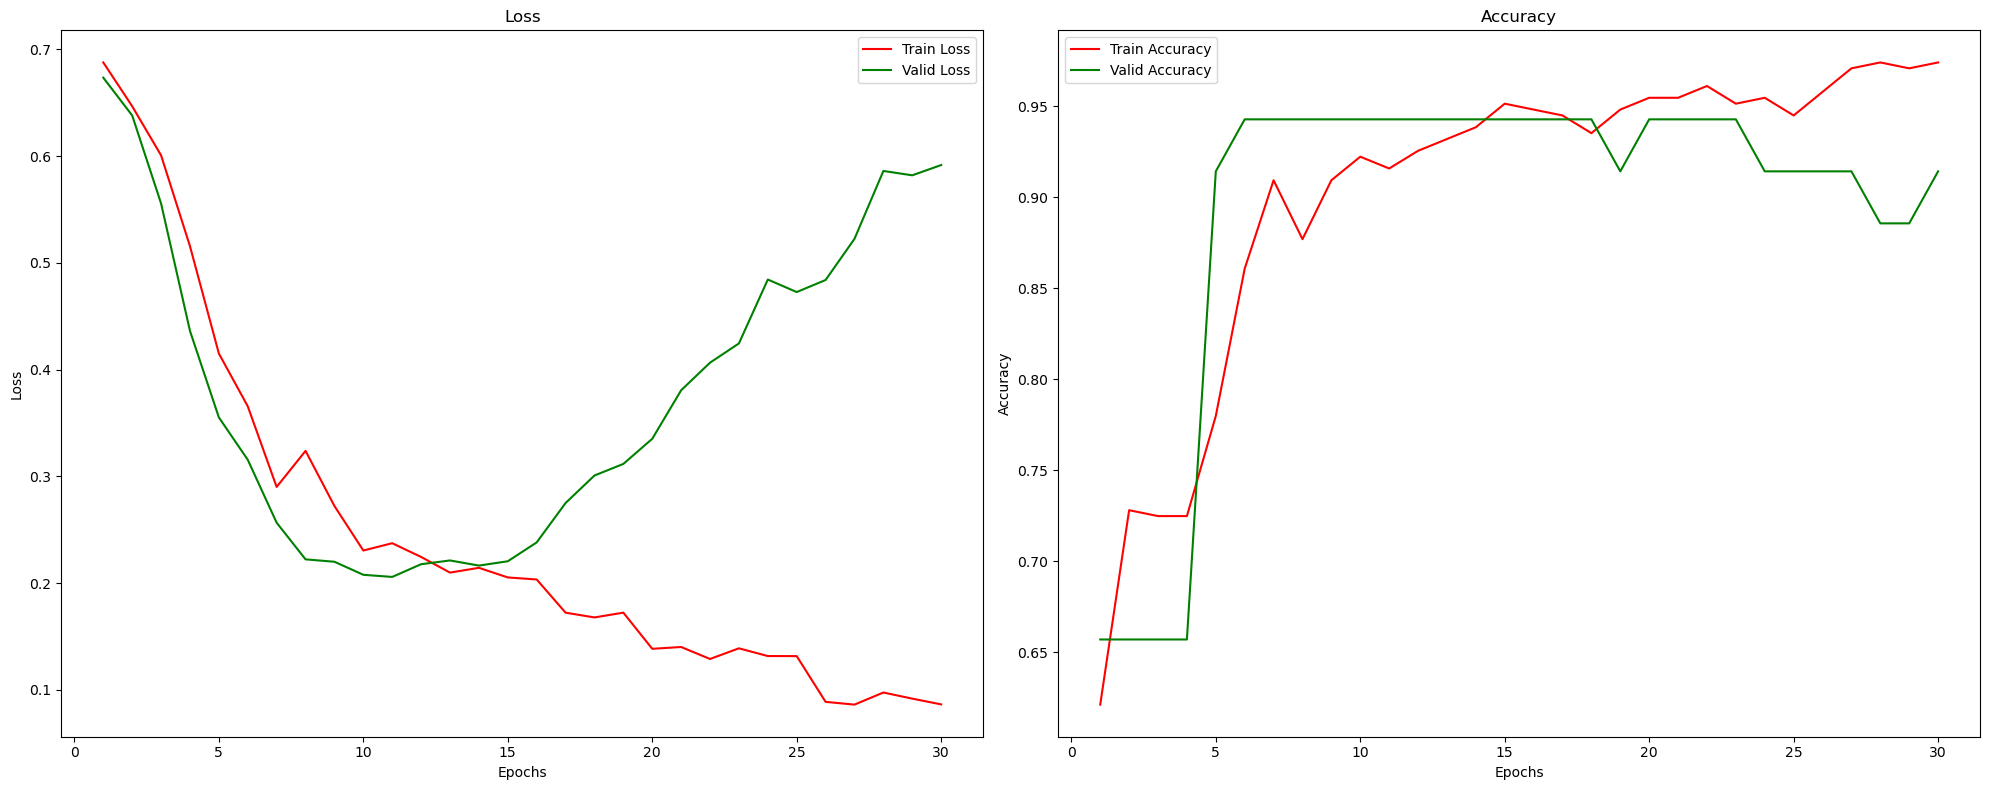

In [17]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [18]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [19]:
y_pred = (y_pred > 0.5)

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[28,  0],
       [ 0, 11]], dtype=int64)

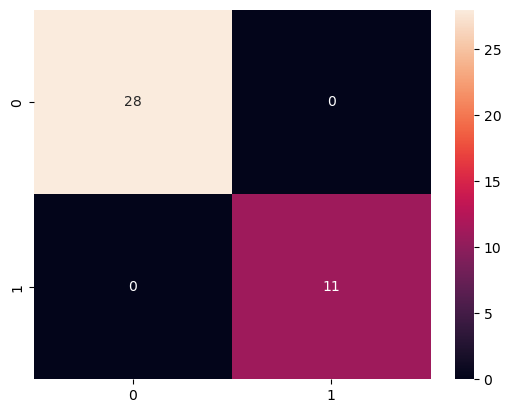

In [21]:
sns.heatmap(cm, annot=True)
plt.show()